In [397]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [398]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pickle
import jax.numpy as jnp

import jaxley as jx
from nex.colors import cols as papercols

In [399]:
import time
import IPython.display as IPd
from svgutils.compose import *

In [400]:
setup = "488683425"  # , "485574832", "488683425", "480353286", "473601979",

with open(f"../results/02_allen/all_best_params_mae_{setup}.pkl", "rb") as handle:
    all_best_params = pickle.load(handle)
with open(f"../results/02_allen/best_traces_mae_{setup}.pkl", "rb") as handle:
    best_traces = pickle.load(handle)
with open(f"../results/02_allen/best_losses_mae_{setup}.pkl", "rb") as handle:
    best_losses = pickle.load(handle)
with open(f"../results/02_allen/total_sims_mae_{setup}.pkl", "rb") as handle:
    total_sims = pickle.load(handle)
with open(f"../results/02_allen/time_vec_mae_{setup}.pkl", "rb") as handle:
    time_vec = pickle.load(handle)
with open(f"../results/02_allen/losses_of_every_starting_point_mae_{setup}.pkl", "rb") as handle:
    losses_of_every_starting_point = pickle.load(handle)
with open(f"../results/02_allen/ga_losses_mae_{setup}.pkl", "rb") as handle:
    ga_losses = pickle.load(handle)

niter = 10
ga_losses = np.asarray(ga_losses)[:, :niter]
losses_of_every_starting_point = np.asarray(losses_of_every_starting_point)[:, :niter]

### Runtime panel

In [401]:
thrs = {
    "485574832": 1.5,
    "488683425": 1.5,
    "480353286": 1.5,
    "473601979": 1.5,
}
thr = thrs[setup]

def infer_num_required(losses_of_every_starting_point):

    number_of_required_simulations_gd = 0
    num_converged = 0
    for l in losses_of_every_starting_point[:10]:
        first_good_one = np.where(np.asarray(l) < thr)[0]
        if len(first_good_one) > 0:
            number_of_required_simulations_gd += first_good_one[0] + 1
            num_converged += 1
        else:
            number_of_required_simulations_gd += len(l)
    print("num_converged", num_converged)
    return number_of_required_simulations_gd / num_converged

num_sim_per_iter = 10
ga_required = infer_num_required(ga_losses) * num_sim_per_iter
gd_required = infer_num_required(losses_of_every_starting_point)

num_converged 8
num_converged 6


In [402]:
duration_forward_pass = 0.8  # Seconds.
duration_for_gradient = 5.1  # Seconds.

Runtime GA 46.0 GD 70.3


/var/folders/kv/39t9blx569l5_sxxzx89vb3c0000gn/T/ipykernel_31021/1282930927.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax2.set_yticklabels(["10¹", "", "10³"])
/var/folders/kv/39t9blx569l5_sxxzx89vb3c0000gn/T/ipykernel_31021/1282930927.py:39: UserWarning: Glyph 8304 (\N{SUPERSCRIPT ZERO}) missing from current font.
  plt.savefig(f"../svg/panel_c2_supp_allen_{setup}.svg", bbox_inches="tight", transparent=True)
/Users/michaeldeistler/anaconda3/envs/nex/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8304 (\N{SUPERSCRIPT ZERO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


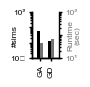

In [403]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(0.35, 0.6))
    
    _ = ax.bar([1-0.15, 2-0.15], [ga_required, gd_required], color="k", width=0.3)
    _ = ax.axhline(1.0)
    _ = ax.set_yscale("log")
    _ = ax.set_xlabel("")
    _ = ax.set_xticks([1, 2])
    _ = ax.set_xticklabels(["GA", "GD"], rotation=90)
    _ = ax.set_yticks([1, 10, 100, 1000])
    _ = ax.set_ylim([1, 1000])
    _ = ax.set_yticklabels(["10⁰", "", "", "10³"])
    _ = ax.set_ylabel("#sims", labelpad=-6)
    _ = ax.set_xlim([-0.8, 2.8])

    col2 = "#737373"
    ax2 = ax.twinx()
    ga_runtime = ga_required * duration_forward_pass
    gd_runtime = gd_required * duration_for_gradient + 5.0 * duration_forward_pass
    print("Runtime GA", ga_runtime, "GD", gd_runtime)
    _ = ax2.bar([1+0.15, 2+0.15], [
        ga_runtime,
        gd_runtime, 
    ], color=col2, width=0.3)
    _ = ax2.axhline(1.0)
    _ = ax2.set_yscale("log")
    _ = ax2.set_xlabel("")
    _ = ax2.set_ylabel("Runtime\n(sec)", labelpad=-7, color=col2)
    _ = ax2.set_yticklabels(["10¹", "", "10³"])
    _ = ax2.set_xticks([1, 2])
    _ = ax2.set_xticklabels(["GA", "GD"], rotation=90)
    _ = ax2.set_yticks([10, 100, 1000])
    _ = ax2.set_ylim([10, 1000])
    _ = ax2.set_xlim([0.2, 2.8])
    _ = ax2.tick_params(axis='y', labelcolor=col2)
    # _ = ax.set_title(f"Loss < {thr:.2f}")

    ax.spines["right"].set_visible(True)
    plt.savefig(f"../svg/panel_c2_supp_allen_{setup}.svg", bbox_inches="tight", transparent=True)
    plt.show()

### Morphology panel

In [405]:
cell = jx.read_swc(f"../../../nex/l5pc/cell_types/specimen_{setup}/reconstruction.swc", nseg=4, assign_groups=True)
rotations = {
    "485574832": 155,
    "488683425": 195,
    "480353286": 175,
    "473601979": 195,
}
rotation = rotations[setup]
cell.rotate(rotation)


/Users/michaeldeistler/Documents/phd/jaxley/jaxley/utils/swc.py:32: UserWarning: Found a soma which consists of a single traced point. `Jaxley` interprets this soma as a spherical compartment with radius specified in the SWC file, i.e. with surface area 4*pi*r*r.
  warn(


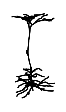

In [406]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(0.6, 1.2))
    ax = cell.vis(ax=ax, morph_plot_kwargs={"linewidth": 0.2})
    ax = cell.soma[0,0].vis(ax=ax, col=papercols["soma"], morph_plot_kwargs={"linewidth": 0.2, "s": 15, "zorder": 1000})
    ax = cell.apical.vis(ax=ax, col=papercols["apical"], morph_plot_kwargs={"linewidth": 0.5})
    ax = cell.axon.vis(ax=ax, col=papercols["axon"], morph_plot_kwargs={"linewidth": 0.5})
    ax = cell.basal.vis(ax=ax, col=papercols["basal"], morph_plot_kwargs={"linewidth": 0.5})
    _ = ax.spines["left"].set_visible(False)
    _ = ax.spines["bottom"].set_visible(False)
    _ = ax.set_xticks([])
    _ = ax.set_yticks([])
    plt.savefig(f"../svg/panel_d1_supp_allen_{setup}.svg", bbox_inches="tight", transparent=True)
    plt.show()

# Assemble

In [411]:
def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

svg_scale = 1.334  # set this to 1.334 for Inkscape, 1.0 otherwise

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '8pt', 'font': 'Arial', 'weight': '800'}
kwargs_text_normal = {'size': '6pt', 'font': 'Arial'}

f = Figure(
    "14.2cm",
    "2.1cm",
    Panel(SVG("../svg/panel_d1_supp_allen_485574832.svg").scale(1.1)).move(0, -7.8),
    Panel(SVG("../svg/panel_d1_supp_allen_488683425.svg").scale(1.1)).move(137, -8.5),
    Panel(SVG("../svg/panel_d1_supp_allen_480353286.svg").scale(1.1)).move(274, -7.8),
    Panel(SVG("../svg/panel_d1_supp_allen_473601979.svg").scale(1.1)).move(406, -8.5),
    Panel(SVG("../svg/panel_c2_supp_allen_485574832.svg").scale(svg_scale)).move(40, -8.5),
    Panel(SVG("../svg/panel_c2_supp_allen_488683425.svg").scale(svg_scale)).move(175, -8.5),
    Panel(SVG("../svg/panel_c2_supp_allen_480353286.svg").scale(svg_scale)).move(310, -8.5),
    Panel(SVG("../svg/panel_c2_supp_allen_473601979.svg").scale(svg_scale)).move(445, -8.5),
)

!mkdir -p fig
f.save("../fig/fig3_supp_allen_runtime.svg")
svg("../fig/fig3_supp_allen_runtime.svg")

In [414]:
def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

svg_scale = 1.334  # set this to 1.334 for Inkscape, 1.0 otherwise

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '8pt', 'font': 'Arial', 'weight': '800'}
kwargs_text_normal = {'size': '6pt', 'font': 'Arial'}

f = Figure(
    "9.0cm",
    "2.6cm",
    Panel(SVG("../svg/panel_d1_480353286.svg").scale(svg_scale)).move(0, 0),
    Panel(SVG("../svg/panel_d1_473601979.svg").scale(svg_scale)).move(165, 0),
    Panel(SVG("../svg/panel_d2_480353286.svg").scale(svg_scale)).move(45, 2),
    Panel(SVG("../svg/panel_d2_473601979.svg").scale(svg_scale)).move(210, 2),
    Panel(SVG("../svg/panel_d3_480353286.svg").scale(svg_scale)).move(45, 47.5),
    Panel(SVG("../svg/panel_d3_473601979.svg").scale(svg_scale)).move(210, 47.5),
)

!mkdir -p fig
f.save("../fig/fig3_supp_allen_fit.svg")
svg("../fig/fig3_supp_allen_fit.svg")